# Create the Bayesian Network

In [6]:
import pandas as pd
import pickle

# Import the pre-processed dataset and its values mapping
data = pd.read_csv("./dataset_final.csv")
with open('label_mappings.pkl', 'rb') as f: label_mappings = pickle.load(f)

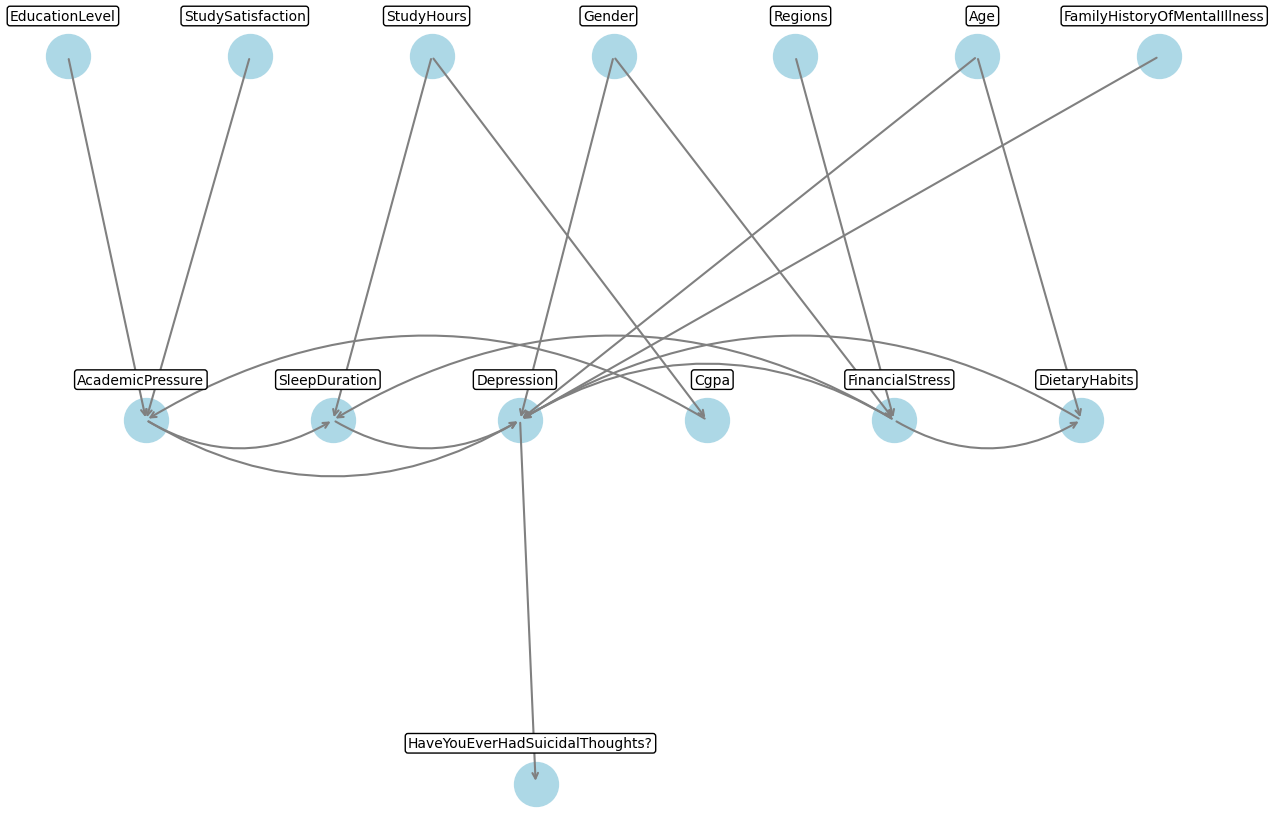

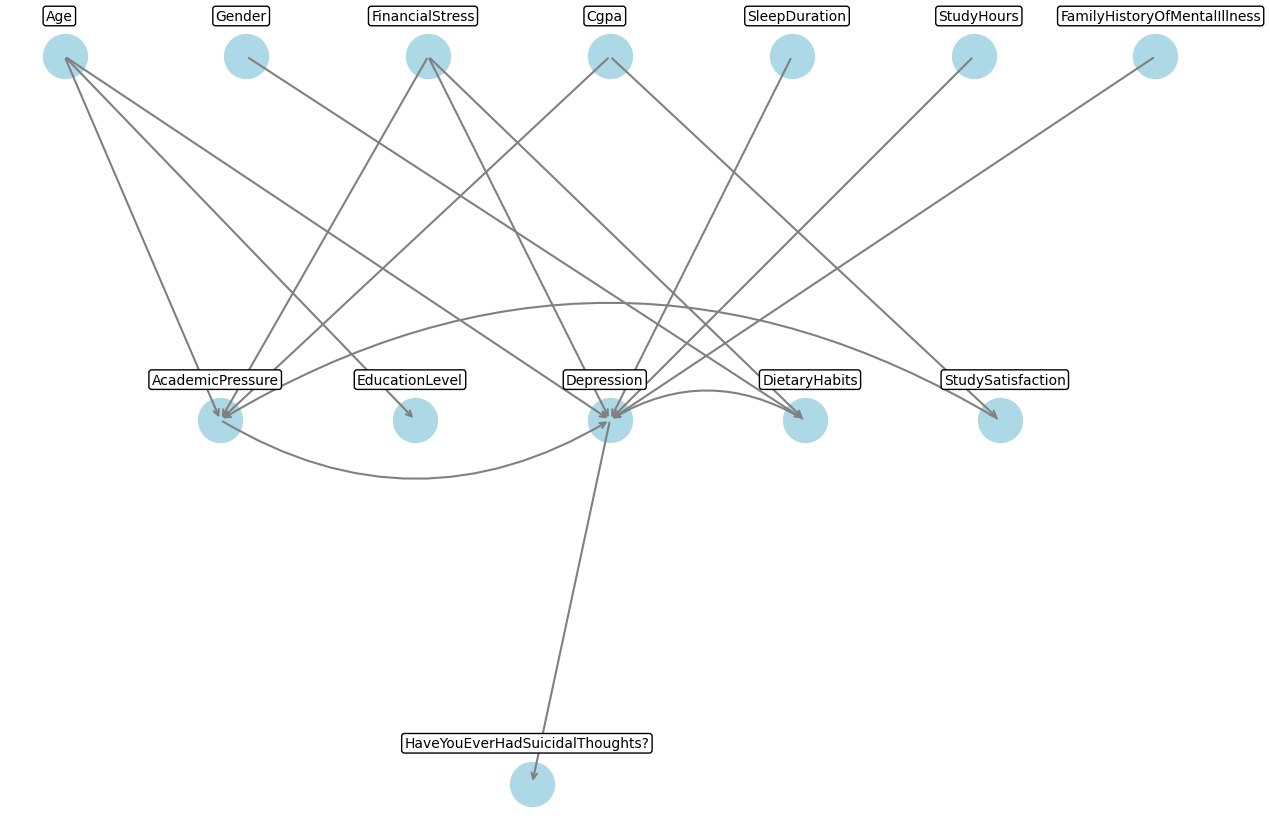

In [113]:
from pgmpy.models import BayesianNetwork
import networkx as nx
from utils import hierarchical_layout,draw_graph

# # Network Pelle with Stress
# network_structure = [
#     ("EducationLevel", "AcademicPressure"),
#     ("CGPA", "AcademicPressure"),
#     ("StudySatisfaction", "AcademicPressure"),
#     ("StudyHours", "Cgpa"),
#     ("StudyHours", "SleepDuration"),
#     ("AcademicPressure", "SleepDuration"), # https://www.academia.edu/126545022/The_Relationship_of_Academic_Stress_Sleep_Quality_and_Self_Esteem_Among_University_Students
#     ("AcademicPressure", "Stress"),
#     ("Gender", "FinancialStress"), # https://www.tandfonline.com/doi/full/10.1080/00036846.2023.2273241
#     ("Regions", "FinancialStress"), 
#     ("Age", "DietaryHabits"), # https://pubmed.ncbi.nlm.nih.gov/11426286/
#     ("FinancialStress", "SleepDuration"), # https://www.mdpi.com/2076-328X/11/5/69
#     ("FinancialStress", "DietaryHabits"), # ???
#     ("FinancialStress", "Stress"),
#     ("SleepDuration", "Stress"), # https://academic.oup.com/sleep/article/47/Supplement_1/A57/7654261
#     ("DietaryHabits", "Stress"), # https://www.tandfonline.com/doi/pdf/10.1080/07448481.2024.2418521
#     ("Depression", "HaveYouEverHadSuicidalThoughts?"), # https://www.psychologytoday.com/us/basics/suicide/mental-health-conditions-suicide
#     ("Stress", "Depression"), # https://pmc.ncbi.nlm.nih.gov/articles/PMC3049314/
#     ("FamilyHistoryOfMentalIllness", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/familial-risk-for-depressive-and-anxiety-disorders-associations-with-genetic-clinical-and-psychosocial-vulnerabilities/E48CB3FAAF084061C759CB440D2E8398
#     ("Gender", "Depression"), # https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/gender-differences-in-depression/0770B51752F17A5A081F9878B0952608
#     ("Age", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/abs/age-differences-in-major-depression-results-from-the-national-comorbidity-survey-replication-ncsr/1DD685D5874EC40C25CF047DAA15E2F8
# ]

# # Network Pelle without Stress
network_structure1= [
     ("EducationLevel", "AcademicPressure"),
     ("Cgpa", "AcademicPressure"),
     ("StudySatisfaction", "AcademicPressure"),
     ("StudyHours", "Cgpa"),
     ("StudyHours", "SleepDuration"),
     ("AcademicPressure", "SleepDuration"), # https://www.academia.edu/126545022/The_Relationship_of_Academic_Stress_Sleep_Quality_and_Self_Esteem_Among_University_Students
     ("Gender", "FinancialStress"), # https://www.tandfonline.com/doi/full/10.1080/00036846.2023.2273241
     ("Regions", "FinancialStress"), 
     ("Age", "DietaryHabits"), # https://pubmed.ncbi.nlm.nih.gov/11426286/
     ("FinancialStress", "SleepDuration"), # https://www.mdpi.com/2076-328X/11/5/69
     ("FinancialStress", "DietaryHabits"), # ???
     ("AcademicPressure", "Depression"),
     ("FinancialStress", "Depression"),
     ("SleepDuration", "Depression"),
     ("DietaryHabits", "Depression"),
     ("Depression", "HaveYouEverHadSuicidalThoughts?"), # https://www.psychologytoday.com/us/basics/suicide/mental-health-conditions-suicide
     ("FamilyHistoryOfMentalIllness", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/familial-risk-for-depressive-and-anxiety-disorders-associations-with-genetic-clinical-and-psychosocial-vulnerabilities/E48CB3FAAF084061C759CB440D2E8398
     ("Gender", "Depression"), # https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/gender-differences-in-depression/0770B51752F17A5A081F9878B0952608
     ("Age", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/abs/age-differences-in-major-depression-results-from-the-national-comorbidity-survey-replication-ncsr/1DD685D5874EC40C25CF047DAA15E2F8
 ]
 # Network Giorgio with Stress
# network_structure = [
#     ("Age","AcademicPressure"),
#     ("Age", "EducationLevel"),
#     ("Age", "Depression"),
#     ("Gender", "DietaryHabits"),
#     ("FinancialStress", "AcademicPressure"),
#     ("FinancialStress", "Stress"),
#     ("FinancialStress", "DietaryHabits"),
#     ("Cgpa", "StudySatisfaction"),
#     ("Cgpa", "AcademicPressure"),
#     ("StudySatisfaction", "AcademicPressure"),
#     ("AcademicPressure", "Stress"),
#     ("SleepDuration", "Stress"),
#     ("StudyHours", "Stress"),
#     ("Stress", "Depression"),
#     ("DietaryHabits", "Depression"),
#     ("FamilyHistoryOfMentalIllness", "Depression"),
#     ("Depression", "HaveYouEverHadSuicidalThoughts?")
# ]

# # Network Giorgio without Stress
network_structure = [
    ("Age", "AcademicPressure"),
    ("Age", "EducationLevel"),
    ("Age", "Depression"),
    ("Gender", "DietaryHabits"),
    ("FinancialStress", "AcademicPressure"),
    ("FinancialStress", "DietaryHabits"),
    ("FinancialStress", "Depression"),  
    ("Cgpa", "StudySatisfaction"),
    ("Cgpa", "AcademicPressure"),
    ("StudySatisfaction", "AcademicPressure"),
    ("AcademicPressure", "Depression"),  
    ("SleepDuration", "Depression"),  
    ("StudyHours", "Depression"),  
    ("DietaryHabits", "Depression"),
    ("FamilyHistoryOfMentalIllness", "Depression"),
    ("Depression", "HaveYouEverHadSuicidalThoughts?")
]

BN=BayesianNetwork(network_structure)
BN1=BayesianNetwork(network_structure1)

# Plot its graph
G = nx.DiGraph()
G.add_edges_from(BN1.edges())
pos = hierarchical_layout(G, horizontal_spacing=3.0)
draw_graph(G, pos)
G = nx.DiGraph()
G.add_edges_from(BN.edges())
pos = hierarchical_layout(G, horizontal_spacing=3.0)
draw_graph(G, pos)

# Fit the network with the processed data

In [120]:
for c in data.columns:
    if c not in BN1.nodes() : print(c)

EducationCategory


In [123]:
from pgmpy.estimators import MaximumLikelihoodEstimator, ExpectationMaximization, BayesianEstimator
BN.fit(
    data=data.drop(columns=["Regions", "EducationCategory"]), estimator=BayesianEstimator
)

BN1.fit(data=data.drop(columns="EducationCategory"),estimator=BayesianEstimator)

In [124]:
print(BN.edges())


[('Age', 'AcademicPressure'), ('Age', 'EducationLevel'), ('Age', 'Depression'), ('AcademicPressure', 'Depression'), ('Depression', 'HaveYouEverHadSuicidalThoughts?'), ('Gender', 'DietaryHabits'), ('DietaryHabits', 'Depression'), ('FinancialStress', 'AcademicPressure'), ('FinancialStress', 'DietaryHabits'), ('FinancialStress', 'Depression'), ('Cgpa', 'StudySatisfaction'), ('Cgpa', 'AcademicPressure'), ('StudySatisfaction', 'AcademicPressure'), ('SleepDuration', 'Depression'), ('StudyHours', 'Depression'), ('FamilyHistoryOfMentalIllness', 'Depression')]


# Explore some features

In [125]:
# Markov blanket of a node to understand which variables directly influence that node
node = "AcademicPressure"
print(f"Markov Blanket of {node}:",BN.get_markov_blanket(node))

...

Markov Blanket of AcademicPressure: ['Depression', 'Age', 'SleepDuration', 'FinancialStress', 'StudyHours', 'StudySatisfaction', 'FamilyHistoryOfMentalIllness', 'DietaryHabits', 'Cgpa']


Ellipsis

In [126]:
print(BN.edges())

[('Age', 'AcademicPressure'), ('Age', 'EducationLevel'), ('Age', 'Depression'), ('AcademicPressure', 'Depression'), ('Depression', 'HaveYouEverHadSuicidalThoughts?'), ('Gender', 'DietaryHabits'), ('DietaryHabits', 'Depression'), ('FinancialStress', 'AcademicPressure'), ('FinancialStress', 'DietaryHabits'), ('FinancialStress', 'Depression'), ('Cgpa', 'StudySatisfaction'), ('Cgpa', 'AcademicPressure'), ('StudySatisfaction', 'AcademicPressure'), ('SleepDuration', 'Depression'), ('StudyHours', 'Depression'), ('FamilyHistoryOfMentalIllness', 'Depression')]


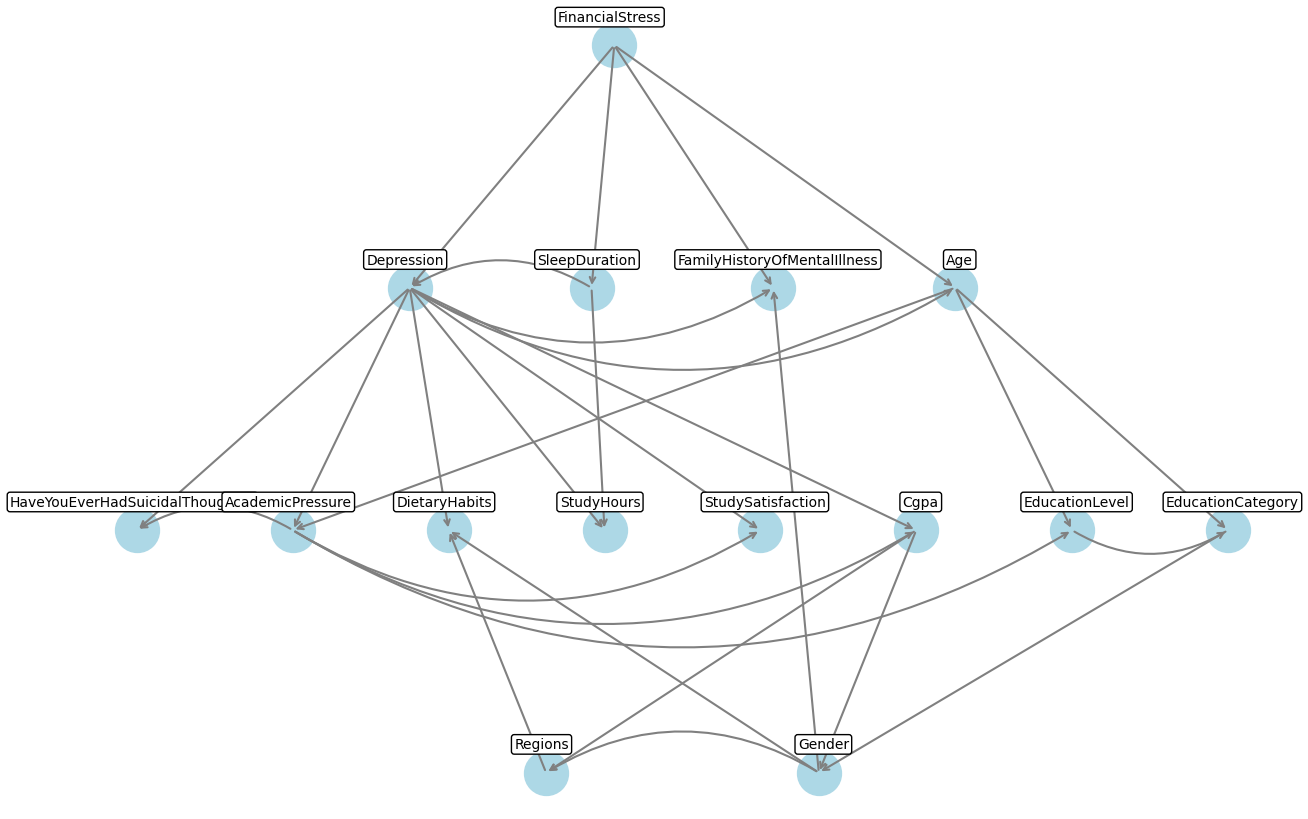

In [127]:
# Plot its graph
G = nx.DiGraph()
G.add_edges_from(learned_model.edges())
pos = hierarchical_layout(G, horizontal_spacing=3.0)
draw_graph(G, pos)

# Evaluate the model

In [128]:
from pgmpy.estimators import PC, HillClimbSearch, AICScore
from pgmpy.metrics import  structure_score, log_likelihood_score
from pgmpy.estimators import AICScore, AICScore




hc = HillClimbSearch(data)
learned_model = hc.estimate(scoring_method=AICScore(data))  # Estimate a comparison model
mod=BayesianNetwork(learned_model.edges())
mod.fit(data, estimator=BayesianEstimator, prior_type="BDeu")

bic_score = AICScore(data)
score = bic_score.score(learned_model)
print(f"BIC Score: {score}")

bic_score = AICScore(data.drop(columns=["Regions", "EducationCategory"]))
score = bic_score.score(BN)
print(f"BIC Score: {score}")


# Structural difference score
# => SHD is defined as total number of basic operations: adding edges, removing edges, 
# and reversing edges required to transform one graph to the other. 
# It is a symmetrical measure.
#shd_value = StructuralHammingDistance(BN, learned_model)
#shd_value

# Distribution comparison
# => Function to score how well the model structure represents the correlations in 
# the data. The model doesn’t need to be parameterized for this score.
correlation = structure_score(BN, data.drop(columns=["Regions", "EducationCategory"]), scoring_method='bdeu')
print(structure_score(mod, data, scoring_method='bdeu'))
print(structure_score(BN1, data.drop(columns="EducationCategory"), scoring_method='bdeu'))
correlation

# Returns a p-value for testing whether the given data is 
# faithful to the model structure’s constraints.
#fisher_score = fisher_c(true_model, data)

# Tests the implied Conditional Independences (CI) of the DAG in the given data. 
# Each missing edge in a model structure implies a CI statement. If the distribution 
# of the data is faithful to the constraints of the model structure, these CI statements 
# should hold in the data as well. This function runs statistical tests for each implied 
# CI on the given data.
#cis = implied_cis(true_model)

# The log-likelihood measure can be used to check how well the specified model describes 
# the data. This method requires the parameters of the model to be specified as well. 
# !! Direct interpretation of this score is difficult but can be used to compare the fit of two or more models. !!
# A higher score means ab better fit.
log_likelihood = log_likelihood_score(BN, data.drop(columns=["Regions", "EducationCategory"]))
print(log_likelihood_score(mod, data))
log_likelihood

# Uses the standard model scoring methods to give a score for each structure. 
# The score doesn’t have very straight forward interpretebility but can be used to 
# compare different models. A higher score represents a better fit.
#structure_s = structure_score(true_model, data, scoring_method=AICScore(data))

  0%|          | 29/1000000 [00:00<4:53:48, 56.73it/s]


BIC Score: -464907.7871287597
BIC Score: -424748.1467644335
-466319.415408551
-474292.36001706833
-465399.88034926716


np.float64(-423952.494571026)

In [129]:
list(BN1.nodes())

['EducationLevel',
 'AcademicPressure',
 'Cgpa',
 'StudySatisfaction',
 'StudyHours',
 'SleepDuration',
 'Gender',
 'FinancialStress',
 'Regions',
 'Age',
 'DietaryHabits',
 'Depression',
 'HaveYouEverHadSuicidalThoughts?',
 'FamilyHistoryOfMentalIllness']

In [130]:

bic_score = AICScore(data)
score = bic_score.score(BN1)
print(f"BIC Score: {score}")

BIC Score: -461224.35844884155


# Queries

In [131]:
from pgmpy.inference import VariableElimination
exact_infer = VariableElimination(mod)
exact_result = exact_infer.query(   # P(C|A=1)
    variables=['AcademicPressure'], 
    evidence={'Age': 1}
)

from pgmpy.sampling import BayesianModelSampling
sampler = BayesianModelSampling(mod)
samples = sampler.forward_sample(size=10000)
filtered_samples = samples[samples['Age'] == 1]
approx_result = filtered_samples['AcademicPressure'].value_counts(normalize=True)

print("Exact result: ", exact_result)
print("Approx result: ", approx_result)

from pgmpy.inference import VariableElimination
exact_infer = VariableElimination(BN)
exact_result = exact_infer.query(   # P(C|A=1)
    variables=['AcademicPressure'], 
    evidence={'Age': 1}
)

from pgmpy.sampling import BayesianModelSampling
sampler = BayesianModelSampling(BN)
samples = sampler.forward_sample(size=10000)
filtered_samples = samples[samples['Age'] == 1]
approx_result = filtered_samples['AcademicPressure'].value_counts(normalize=True)

print("Exact result: ", exact_result)
print("Approx result: ", approx_result)

Generating for node: DietaryHabits: 100%|██████████| 15/15 [00:00<00:00, 175.50it/s]


Exact result:  +---------------------+-------------------------+
| AcademicPressure    |   phi(AcademicPressure) |
+=====================+=========================+
| AcademicPressure(0) |                  0.0000 |
+---------------------+-------------------------+
| AcademicPressure(1) |                  0.1480 |
+---------------------+-------------------------+
| AcademicPressure(2) |                  0.1603 |
+---------------------+-------------------------+
| AcademicPressure(3) |                  0.2627 |
+---------------------+-------------------------+
| AcademicPressure(4) |                  0.1886 |
+---------------------+-------------------------+
| AcademicPressure(5) |                  0.2404 |
+---------------------+-------------------------+
Approx result:  AcademicPressure
3    0.276281
5    0.208936
2    0.177398
4    0.170171
1    0.167214
Name: proportion, dtype: float64


Generating for node: AcademicPressure:   0%|          | 0/13 [00:00<?, ?it/s] WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
Generating for node: HaveYouEverHadSuicidalThoughts?: 100%|██████████| 13/13 [00:00<00:00, 175.40it/s]

Exact result:  +---------------------+-------------------------+
| AcademicPressure    |   phi(AcademicPressure) |
+=====================+=========================+
| AcademicPressure(0) |                  0.0001 |
+---------------------+-------------------------+
| AcademicPressure(1) |                  0.1477 |
+---------------------+-------------------------+
| AcademicPressure(2) |                  0.1587 |
+---------------------+-------------------------+
| AcademicPressure(3) |                  0.2628 |
+---------------------+-------------------------+
| AcademicPressure(4) |                  0.1887 |
+---------------------+-------------------------+
| AcademicPressure(5) |                  0.2420 |
+---------------------+-------------------------+
Approx result:  AcademicPressure
3    0.264774
5    0.226147
4    0.192803
1    0.158138
2    0.157808
0    0.000330
Name: proportion, dtype: float64
